In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Segmentation'] = le.fit_transform(df['Segmentation'])

In [6]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes

ID                   int64
Age                  int64
Work_Experience    float64
Family_Size        float64
Segmentation         int32
dtype: object

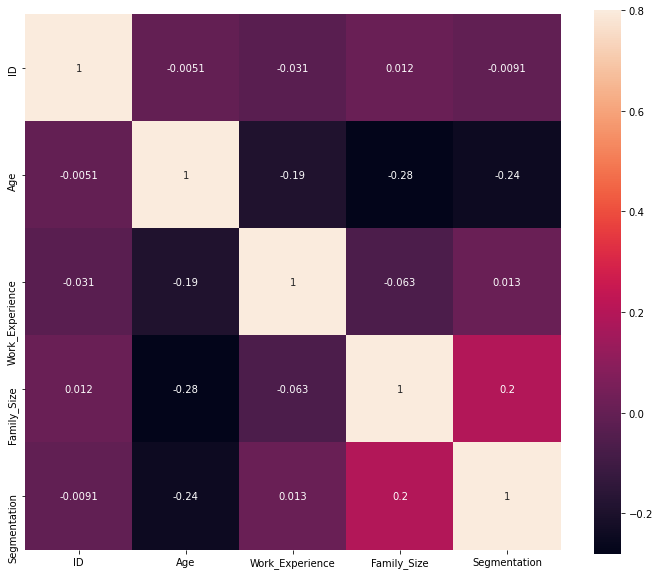

In [7]:
corr =numeric_features.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=.8, square=True,annot=True)

In [8]:
corr_matrix = abs(df.corr())
print(corr_matrix["Segmentation"].sort_values(ascending=False))

Segmentation       1.000000
Age                0.243552
Family_Size        0.196213
Work_Experience    0.012993
ID                 0.009104
Name: Segmentation, dtype: float64


In [9]:
cat_features = df.select_dtypes(include=[np.object])
cat_features.dtypes

Gender            object
Ever_Married      object
Graduated         object
Profession        object
Spending_Score    object
Var_1             object
dtype: object

In [10]:
cat_features.columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')

In [11]:
df = pd.get_dummies(df, columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'])

In [12]:
df.isnull().sum()

ID                            0
Age                           0
Work_Experience             829
Family_Size                 335
Segmentation                  0
Gender_Female                 0
Gender_Male                   0
Ever_Married_No               0
Ever_Married_Yes              0
Graduated_No                  0
Graduated_Yes                 0
Profession_Artist             0
Profession_Doctor             0
Profession_Engineer           0
Profession_Entertainment      0
Profession_Executive          0
Profession_Healthcare         0
Profession_Homemaker          0
Profession_Lawyer             0
Profession_Marketing          0
Spending_Score_Average        0
Spending_Score_High           0
Spending_Score_Low            0
Var_1_Cat_1                   0
Var_1_Cat_2                   0
Var_1_Cat_3                   0
Var_1_Cat_4                   0
Var_1_Cat_5                   0
Var_1_Cat_6                   0
Var_1_Cat_7                   0
dtype: int64

In [13]:
df['Work_Experience'] = df['Work_Experience'].fillna(df['Work_Experience'].median())
df['Family_Size'] = df['Family_Size'].fillna(df['Family_Size'].median())

In [14]:
df.isnull().sum()

ID                          0
Age                         0
Work_Experience             0
Family_Size                 0
Segmentation                0
Gender_Female               0
Gender_Male                 0
Ever_Married_No             0
Ever_Married_Yes            0
Graduated_No                0
Graduated_Yes               0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Spending_Score_Average      0
Spending_Score_High         0
Spending_Score_Low          0
Var_1_Cat_1                 0
Var_1_Cat_2                 0
Var_1_Cat_3                 0
Var_1_Cat_4                 0
Var_1_Cat_5                 0
Var_1_Cat_6                 0
Var_1_Cat_7                 0
dtype: int64

In [15]:
df.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,22,1.0,4.0,3,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,462643,38,1.0,3.0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,466315,67,1.0,1.0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,461735,67,0.0,2.0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,462669,40,1.0,6.0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [16]:
corr_matrix = abs(df.corr())
print(corr_matrix["Segmentation"].sort_values(ascending=False))

Segmentation                1.000000
Profession_Healthcare       0.366234
Age                         0.243552
Ever_Married_Yes            0.215602
Ever_Married_No             0.213730
Family_Size                 0.191476
Graduated_No                0.178683
Graduated_Yes               0.175377
Profession_Artist           0.148684
Spending_Score_Low          0.113668
Profession_Entertainment    0.108199
Profession_Marketing        0.089675
Profession_Engineer         0.086973
Spending_Score_High         0.072198
Spending_Score_Average      0.069193
Profession_Lawyer           0.061604
Gender_Male                 0.026403
Gender_Female               0.026403
Var_1_Cat_2                 0.022898
Profession_Executive        0.022673
Var_1_Cat_1                 0.017313
Var_1_Cat_6                 0.015191
Profession_Doctor           0.013107
ID                          0.009104
Work_Experience             0.008216
Var_1_Cat_5                 0.007709
Var_1_Cat_3                 0.004656
V

In [17]:
df.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,22,1.0,4.0,3,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,462643,38,1.0,3.0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,466315,67,1.0,1.0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,461735,67,0.0,2.0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,462669,40,1.0,6.0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8068 non-null   int64  
 1   Age                       8068 non-null   int64  
 2   Work_Experience           8068 non-null   float64
 3   Family_Size               8068 non-null   float64
 4   Segmentation              8068 non-null   int32  
 5   Gender_Female             8068 non-null   uint8  
 6   Gender_Male               8068 non-null   uint8  
 7   Ever_Married_No           8068 non-null   uint8  
 8   Ever_Married_Yes          8068 non-null   uint8  
 9   Graduated_No              8068 non-null   uint8  
 10  Graduated_Yes             8068 non-null   uint8  
 11  Profession_Artist         8068 non-null   uint8  
 12  Profession_Doctor         8068 non-null   uint8  
 13  Profession_Engineer       8068 non-null   uint8  
 14  Professi

In [19]:
df = df.astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ID                        8068 non-null   int32
 1   Age                       8068 non-null   int32
 2   Work_Experience           8068 non-null   int32
 3   Family_Size               8068 non-null   int32
 4   Segmentation              8068 non-null   int32
 5   Gender_Female             8068 non-null   int32
 6   Gender_Male               8068 non-null   int32
 7   Ever_Married_No           8068 non-null   int32
 8   Ever_Married_Yes          8068 non-null   int32
 9   Graduated_No              8068 non-null   int32
 10  Graduated_Yes             8068 non-null   int32
 11  Profession_Artist         8068 non-null   int32
 12  Profession_Doctor         8068 non-null   int32
 13  Profession_Engineer       8068 non-null   int32
 14  Profession_Entertainment  8068 non-null 

In [21]:
df = df.drop(['ID'],axis =1)

In [22]:
X = df.drop("Segmentation",axis=1)
y = df['Segmentation']

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=37)

In [25]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## A.Logistic

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 1,multi_class="auto")
clf.fit(X_train, y_train)


LogisticRegression(random_state=1)

In [28]:
preds_val = clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds_val)

0.49727317798710957

## B. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
preds_val = clf.predict(X_test)

In [35]:
accuracy_score(y_test, preds_val)

0.42389687654933067

## C. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1,n_estimators=500)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [37]:
preds_val = clf.predict(X_test)

In [38]:
accuracy_score(y_test, preds_val)

0.48834903321765

## D. Gradient Boosting

In [39]:
from lightgbm import LGBMClassifier
clf =  LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [40]:
preds_val = clf.predict(X_test)

In [41]:
accuracy_score(y_test, preds_val)

0.5185919682697074